## **Project : Food 101 (CPS Classification)**
 
  We classified 3 Food items: 
  1. Cheese cake, 
  2. Pizza, and 
  3. Samosa

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


## **Libraries**

In [ ]:
import os
from os import listdir
import pandas as pd
import seaborn as sb
import numpy as np

import time
import imageio

import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.feature_selection import chi2

import cv2
import glob
import random
import numpy as np
import cv2
from keras.preprocessing import image
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Concatenate

from tensorflow import keras
from tensorflow.keras import Sequential
from keras.models import load_model, Model

from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D , Input, Add, Flatten, Dense, Dropout, AveragePooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

import tensorflow as tf
from tensorflow.keras.utils import to_categorical


In [ ]:
directory_root = '/content/drive/My Drive/Semester 3/3104 - Neural Networks & Deep Learning/Assignment 2/Food_dataset_3/'
default_image_size = tuple((256, 256))

## **Visualizalizing Random Food-101**

In [ ]:
def getCount(directory_root):
    food_list = listdir(f"{directory_root}") 
    dic_ = {}
    for label_folder in food_list:
      count = 1
      items = listdir(f"{directory_root}/{label_folder}") 
      for label in items:
        count+=1
      dic_[label_folder] =  count
    return dic_

In [ ]:
dic = getCount(directory_root)
labels = list(dic.keys())
values = list(dic.values())

,Labels,Count
0,701,cheesecake
1,701,pizza
2,701,samosa


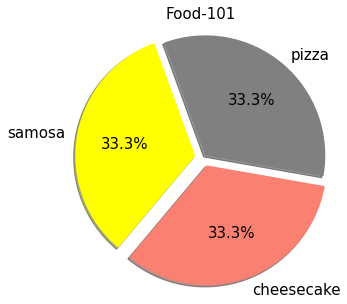

In [ ]:
df = pd.DataFrame(columns=['Labels','Count'])

df['Labels']=values
df['Count']=labels
display(df)

textprops = {"fontsize":15} # Font size of text in pie chart
fig1, ax1 = plt.subplots()

fig1.set_size_inches(5, 5)

colors = ['salmon','grey', 'yellow']

ax1.pie(values, labels=labels, colors= colors, shadow= True,explode=(0.1, 0.03, 0.1), textprops =textprops, radius = 1.4, 
        startangle=-130, autopct='%.1f%%')
ax1.axis('equal')
plt.title('Food-101', fontsize=15)
plt.show()

In [ ]:
  Adef visualizeFoods(directory_root):
    food_list = listdir(f"{directory_root}") 
    plt.figure(figsize = (15,10))

    count = 1
    for label_folder in food_list:
        items = listdir(f"{directory_root}/{label_folder}") 
        for label in items[:3]: 
            plt.subplot(3,3,count)
           
            image_directory = f"{directory_root}/{label_folder}/{label}"
            img = cv2.imread(image_directory)
            Image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(Image, cmap=plt.cm.bone)
            plt.xlabel(label_folder, fontsize=24)
            count+=1
            
    plt.show()

In [ ]:
root_dir = listdir(f"{directory_root}")

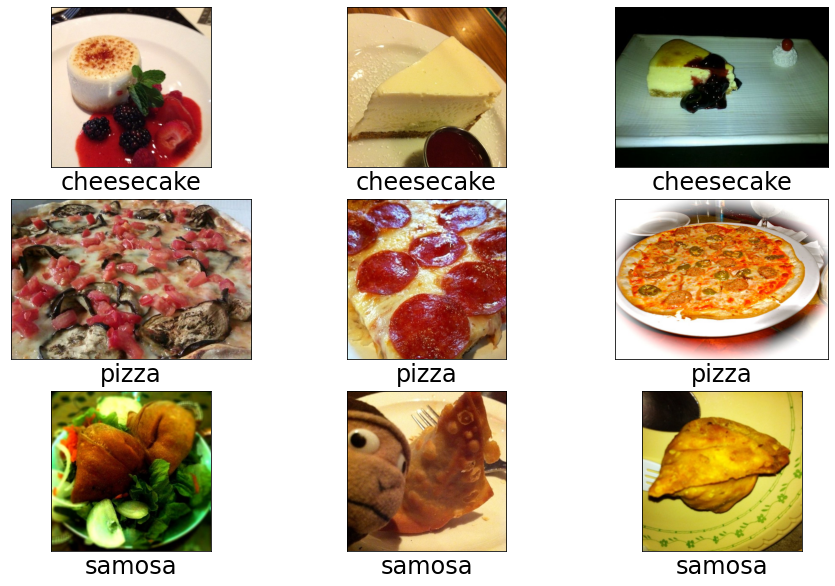

In [ ]:
visualizeFoods(directory_root)

## **Processing Image data & setting label**

In [ ]:
#Function to convert images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print("Error :",e)
        return None

In [ ]:
image_list, label_list = [], []

try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for label_folder in root_dir:
        food_list = listdir(f"{directory_root}/{label_folder}") 
        print("Processing:",label_folder)
        for image in food_list: # Execute all food folders
            image_directory = f"{directory_root}/{label_folder}/{image}"
            image_list.append(convert_image_to_array(image_directory))
            label_list.append(label_folder)
    
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
Processing: cheesecake
Processing: pizza
Processing: samosa
[INFO] Image loading completed


In [ ]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
#image_labels_2 = to_categorical(image_labels)
n_classes = len(label_binarizer.classes_)

In [ ]:
labels_name_list = label_binarizer
print(label_binarizer.classes_)

['cheesecake' 'pizza' 'samosa']


In [ ]:
le_name_mapping = dict(zip(label_binarizer.classes_, label_binarizer.transform(label_binarizer.classes_)))
print(le_name_mapping)

{'cheesecake': array([1, 0, 0]), 'pizza': array([0, 1, 0]), 'samosa': array([0, 0, 1])}


### **Normalizing images**

In [ ]:
np_image_list = np.array(image_list, dtype=np.float16) / 255.0

### **Splitting data to test & train dataset**

In [ ]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels,#image_labels_2,#
                                                    test_size=0.2, random_state = 42, shuffle=True)

[INFO] Spliting data to train, test


In [ ]:
print(x_train.shape, y_train.shape, '\n',x_test.shape, y_test.shape)

(1680, 256, 256, 3) (1680, 3) 
 (420, 256, 256, 3) (420, 3)


### **Augmenting image dataset**

In [ ]:
aug = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    fill_mode="nearest")

In [ ]:
# fit parameters from data
aug.fit(x_train)

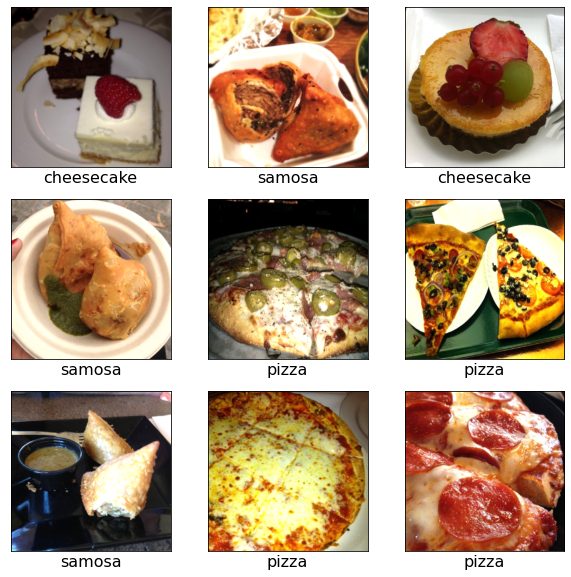

In [ ]:
# Configure batch size and retrieve one batch of images
plt.figure(figsize = (10,10))
for x_batch, y_batch in aug.flow(x_train, y_train, batch_size=32):
    # Show 9 images
    labels_ = label_binarizer.inverse_transform(y_batch[0:9])
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.xticks([])
        plt.yticks([])

        plt.xlabel(labels_[i], fontsize=16)
        Image = cv2.cvtColor(x_batch[i], cv2.COLOR_BGR2RGB)
        plt.imshow(Image, cmap=plt.cm.bone)
    plt.show()
    break

## **Modeling**
1. GoogleNet
2. Custom Model

In [ ]:
EPOCHS = 100#50
INIT_LR = 1e-3
BS = 64

width=256
height=256
depth=3

## **1) GoogleNet**

In [ ]:
# create model
def inception(x, filters):
    # 1x1
    path1 = Conv2D(filters=filters[0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)

    # 1x1->3x3
    path2 = Conv2D(filters=filters[1][0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)
    path2 = Conv2D(filters=filters[1][1], kernel_size=(3,3), strides=1, padding='same', activation='relu')(path2)
    
    # 1x1->5x5
    path3 = Conv2D(filters=filters[2][0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)
    path3 = Conv2D(filters=filters[2][1], kernel_size=(5,5), strides=1, padding='same', activation='relu')(path3)

    # 3x3->1x1
    path4 = MaxPooling2D(pool_size=(3,3), strides=1, padding='same')(x)
    path4 = Conv2D(filters=filters[3], kernel_size=(1,1), strides=1, padding='same', activation='relu')(path4)

    return Concatenate(axis=-1)([path1,path2,path3,path4])


def auxiliary(x, name=None, output_classes = 3):
    layer = AveragePooling2D(pool_size=(5,5), strides=3, padding='valid')(x)
    layer = Conv2D(filters=128, kernel_size=(1,1), strides=1, padding='same', activation='relu')(layer)
    layer = Flatten()(layer)
    layer = Dense(units=256, activation='relu')(layer)
    layer = Dropout(0.4)(layer)
    layer = Dense(units=output_classes, activation='softmax', name=name)(layer)
    return layer

In [ ]:
def googlenet(input_shape, output):
    layer_in = Input(shape=input_shape)#IMAGE_SHAPE)
    
    # stage-1
    layer = Conv2D(filters=64, kernel_size=(7,7), strides=2, padding='same', activation='relu')(layer_in)
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    layer = BatchNormalization()(layer)

    # stage-2
    layer = Conv2D(filters=64, kernel_size=(1,1), strides=1, padding='same', activation='relu')(layer)
    layer = Conv2D(filters=192, kernel_size=(3,3), strides=1, padding='same', activation='relu')(layer)
    layer = BatchNormalization()(layer)
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)

    # stage-3
    layer = inception(layer, [ 64,  (96,128), (16,32), 32]) #3a
    layer = inception(layer, [128, (128,192), (32,96), 64]) #3b
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    
    # stage-4
    layer = inception(layer, [192,  (96,208),  (16,48),  64]) #4a
    aux1  = auxiliary(layer, name='aux1')#, output_classes=output)
    layer = inception(layer, [160, (112,224),  (24,64),  64]) #4b
    layer = inception(layer, [128, (128,256),  (24,64),  64]) #4c
    layer = inception(layer, [112, (144,288),  (32,64),  64]) #4d
    aux2  = auxiliary(layer, name='aux2')#, output_classes=output)
    layer = inception(layer, [256, (160,320), (32,128), 128]) #4e
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    
    # stage-5
    layer = inception(layer, [256, (160,320), (32,128), 128]) #5a
    layer = inception(layer, [384, (192,384), (48,128), 128]) #5b
    layer = AveragePooling2D(pool_size=(7,7), strides=1, padding='valid')(layer)
    
    # stage-6
    layer = Flatten()(layer)
    layer = Dropout(0.4)(layer)
    layer = Dense(units=256, activation='linear')(layer)
    main = Dense(units=3, activation='softmax', name='main')(layer)
    
    model = Model(inputs=layer_in, outputs=[main, aux1, aux2])
    
    return model

In [ ]:
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1


# train model
model = googlenet(inputShape,3)
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 8,208,185
Trainable params: 8,207,673
Non-trainable params: 512
__________________________________________________________________________________________________


In [ ]:
opt = SGD(lr=0.01, momentum=0.9)
# opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# opt = SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="mean_squared_error",#'categorical_crossentropy',#
              optimizer=opt, metrics=['accuracy'])

history = model.fit_generator(aug.flow(x_train, y_train, batch_size = BS),
                              validation_data =(x_test, y_test),
                              steps_per_epoch=len(x_train) // BS,
                              epochs = EPOCHS, verbose = 1)#, workers = 4)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
26/26 [==============================] - 25s 303ms/step - loss: 0.6666 - main_loss: 0.2222 - aux1_loss: 0.2222 - aux2_loss: 0.2222 - main_accuracy: 0.3284 - aux1_accuracy: 0.3423 - aux2_accuracy: 0.3625 - val_loss: 0.6658 - val_main_loss: 0.2222 - val_aux1_loss: 0.2216 - val_aux2_loss: 0.2220 - val_main_accuracy: 0.3262 - val_aux1_accuracy: 0.3667 - val_aux2_accuracy: 0.3167
Epoch 2/100
26/26 [==============================] - 6s 196ms/step - loss: 0.6648 - main_loss: 0.2222 - aux1_loss: 0.2209 - aux2_loss: 0.2217 - main_accuracy: 0.3581 - aux1_accuracy: 0.4122 - aux2_accuracy: 0.3360 - val_loss: 0.6639 - val_main_loss: 0.2221 - val_aux1_loss: 0.2202 - val_aux2_loss: 0.2216 - val_main_accuracy: 0.3119 - val_aux1_accuracy: 0.3524 - val_aux2_accuracy: 0.3119
Epoch 3/100
26/26 [==============================] - 5s 194ms/step - loss: 0.6619 - main_loss: 0.2219 - aux1_loss: 0.2191 - aux2_loss: 0.2209 - main_accuracy: 0.3776 - aux1_accuracy: 0.4896 - aux2_accuracy: 0.4396 - val_l

#### **Accuracy check of GoogleNet model**

In [ ]:
print("[INFO] Calculating GoogleNet model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[-3]*100}")

[INFO] Calculating GoogleNet model accuracy
14/14 [==============================] - 1s 36ms/step - loss: 0.2967 - main_loss: 0.0984 - aux1_loss: 0.1022 - aux2_loss: 0.0961 - main_accuracy: 0.8286 - aux1_accuracy: 0.8024 - aux2_accuracy: 0.8333
Test Accuracy: 82.85714387893677


#### **Saving GoogleNet Model**

In [ ]:
print("[INFO] Saving GoogleNet model H5...")
model.save_weights("/content/drive/My Drive/Semester 3/3104 - Neural Networks & Deep Learning/Assignment 2/Models/GoogleNet.h5")

print('model saved')

[INFO] Saving GoogleNet model H5...
model saved


#### **Visualizing the Accuracy & Loss of GoogleNet**

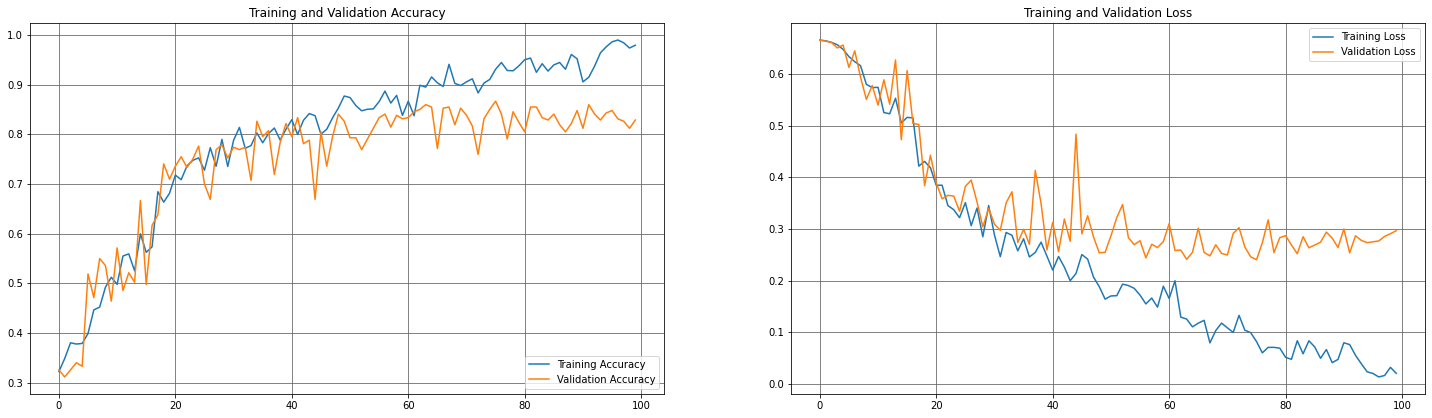

In [ ]:
acc = history.history['main_accuracy']
val_acc = history.history['val_main_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(range(100), acc, label='Training Accuracy')
plt.plot(range(100), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(range(100), loss, label='Training Loss')
plt.plot(range(100), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

## **2) Custom Model**

In [ ]:
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1

model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same",activation="relu",input_shape=inputShape, strides=(1,1)))
# model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Conv2D(16, (3,3), activation='relu', padding="same", strides=(1,1)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3,3), activation='relu', padding="same", strides=(1,1)))
model.add(Conv2D(32, (3,3), activation='relu', padding="same", strides=(1,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu', padding="same", strides=(1,1)))
model.add(Conv2D(128, (3,3), activation='relu', padding="same", strides=(1,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256, (3,3), activation='relu', padding="same", strides=(1,1)))
model.add(Conv2D(256, (3,3), activation='relu', padding="same", strides=(1,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512, (3,3), activation='relu', padding="same", strides=(1,1)))
model.add(Conv2D(512, (3,3), activation='relu', padding="same", strides=(1,1)))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 256, 256, 16)      2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 85, 85, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 85, 85, 32)        4640      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 85, 85, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 42, 42, 128)      

In [ ]:
opt = SGD(lr=0.01, momentum=0.9)
# opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# opt = SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="mean_squared_error",#'categorical_crossentropy',#
              optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit_generator(aug.flow(x_train,y_train,batch_size=BS),
                              validation_data= (x_test, y_test),
                              steps_per_epoch=len(x_train) // BS,
                              epochs=EPOCHS,
                              verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
26/26 [==============================] - 22s 176ms/step - loss: 0.2222 - accuracy: 0.3416 - val_loss: 0.2221 - val_accuracy: 0.3286
Epoch 2/100
26/26 [==============================] - 3s 106ms/step - loss: 0.2220 - accuracy: 0.3837 - val_loss: 0.2220 - val_accuracy: 0.3119
Epoch 3/100
26/26 [==============================] - 3s 105ms/step - loss: 0.2219 - accuracy: 0.3620 - val_loss: 0.2222 - val_accuracy: 0.3119
Epoch 4/100
26/26 [==============================] - 3s 104ms/step - loss: 0.2218 - accuracy: 0.3571 - val_loss: 0.2223 - val_accuracy: 0.3119
Epoch 5/100
26/26 [==============================] - 3s 105ms/step - loss: 0.2218 - accuracy: 0.3509 - val_loss: 0.2219 - val_accuracy: 0.3119
Epoch 6/100
26/26 [==============================] - 3s 104ms/step - loss: 0.2215 - accuracy: 0.3533 - val_loss: 0.2218 - val_accuracy: 0.3214
Epoch 7/100
26/26 [==============================] - 3s 109ms/step - loss: 0.2212 - accuracy: 0.3960 - val_loss: 0.2212 - val_accuracy: 0.383

#### **Accuracy check of Custom model**

In [ ]:
print("[INFO] Calculating Custom model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating Custom model accuracy
14/14 [==============================] - 0s 19ms/step - loss: 0.1231 - accuracy: 0.7810
Test Accuracy: 78.09523940086365


#### **Saving Custom model**

In [ ]:
print("[INFO] Saving Custom model H5...")
# model.save("/content/drive/My Drive/Semester 3/3104 - Neural Networks & Deep Learning/Assignment 2/Models/Custom.h5")
tf.keras.models.save_model(model, '/content/drive/My Drive/Semester 3/3104 - Neural Networks & Deep Learning/Assignment 2/Models/Custom.h5')

print('model saved')

[INFO] Saving Custom model H5...
model saved


#### **Visualizing the Accuracy & Loss of Custom Model**

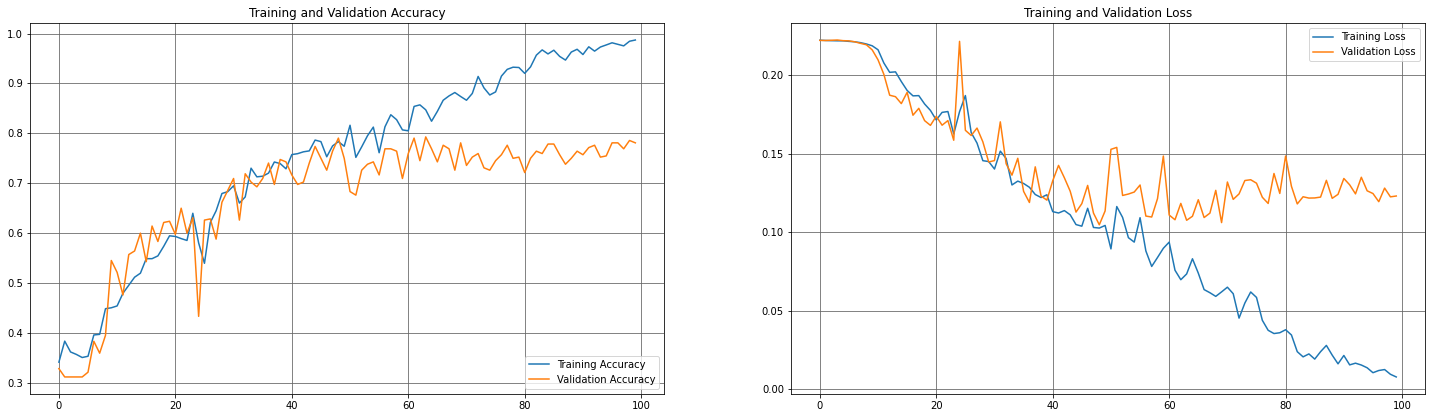

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(range(100), acc, label='Training Accuracy')
plt.plot(range(100), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(range(100), loss, label='Training Loss')
plt.plot(range(100), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

#### **Saving Custom model .h5 to .tflite**

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("/content/drive/My Drive/Semester 3/3104 - Neural Networks & Deep Learning/Assignment 2/Models/Custom.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpm48w60ab/assets


245040048

#### **Converting Custom model to quantized model**

In [ ]:
# Convert the model to quantized version with post-training quantization
model = tf.keras.models.load_model("/content/drive/My Drive/Semester 3/3104 - Neural Networks & Deep Learning/Assignment 2/Models/Custom.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
open("/content/drive/My Drive/Semester 3/3104 - Neural Networks & Deep Learning/Assignment 2/Models/Custom_Quant.tflite", "wb").write(tflite_quant_model)

INFO:tensorflow:Assets written to: /tmp/tmpa763qarc/assets


INFO:tensorflow:Assets written to: /tmp/tmpa763qarc/assets


61327552

####**Manual Testing of Custom Model**

In [ ]:
#Function to convert images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print("Error :",e)
        return None

In [ ]:
model_custom = tf.keras.models.load_model('/content/drive/My Drive/Semester 3/3104 - Neural Networks & Deep Learning/Assignment 2/Models/Custom.h5')
default_image_size = tuple((256, 256))

In [ ]:
image_list=[]

# image_list.append(convert_image_to_array('/content/drive/My Drive/Semester 3/3104 - Neural Networks & Deep Learning/Assignment 2/Food_dataset_3/cheesecake/23673.jpg'))
# image_list.append(convert_image_to_array('/content/drive/My Drive/Semester 3/3104 - Neural Networks & Deep Learning/Assignment 2/Food_dataset_3/pizza/5764.jpg'))
image_list.append(convert_image_to_array('/content/drive/My Drive/Semester 3/3104 - Neural Networks & Deep Learning/Assignment 2/Food_dataset_3/samosa/2302.jpg'))

np_image_list = np.array(image_list, dtype=np.float16) / 225.0

result = model_custom.predict_proba(np_image_list)#predict_classes(np_image_list)

print(result)
reverse_mapping = ['cheesecake', 'pizza', 'samosa']

#printing result
itemindex = np.where(result==np.max(result))

prediction_name = reverse_mapping[itemindex[1][0]]

# prediction_name, itemindex
print("Probability of " + prediction_name + "  is: " +str(np.max(result)))
print("Final Diagonasis result : " +prediction_name)

[[6.2846495e-03 8.5308646e-05 9.9362999e-01]]
Probability of samosa  is: 0.99363
Final Diagonasis result : samosa


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
